Homework 4 : Yeqi Chen 
===

Phase Portraits, expoententials, and solutions

**<span style="color: darkgreen">Due Sunday April 28 at 11:59pm</span>**

**Instructions:** Make a copy of this notebook that you can edit and save. If you are using CoLab, that means clicking File>Save and then "SAVE A COPY IN DRIVE". Then, for each problem, insert your answers directly underneath the problem description as one or more `Code` or `Markdown` cells as appropriate. Every code cell should execute without errors. TAs and graders may not have resources to debug your code. When you are satisfied with your answers upload your notebook to canvas. 

**Relevant Reading**

- Most of the state space and transfer function relationships we have been talking about are in Nise chapters 3 and 4. Block diagrams are in chapter 5.

In [24]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from sympy import *
from IPython.display import display, Markdown

%matplotlib inline

# Comment out in Google colab 
init_printing(use_latex='mathjax')

1. Modeling
---

Do Nise Ch 2, Problem 62. 

a. if we take the derivative of the solution: 
$$\frac{dv(t)}{dt} = v_0\lambda*e^{\frac{\lambda}{a}(1-e^{-at})} *e^{-at}$$, which is equal to 
$\lambda * e^{-at}*v(t)$.
So the the equation is the solution of the differential equation. 

b. 
directly calculate the limit: plug in $t = \infty$
$$\lim_{t\rightarrow \infty}v(t) = v_0e^{\frac{\lambda}{a}(1-e^{-a*\infty})} $$
$$ = v_0e^{\frac{\lambda}{a}(1-0)} = v_0e^{\frac{\lambda}{a}}$$



Text(0.5,1,'tumor volume vs. time ')

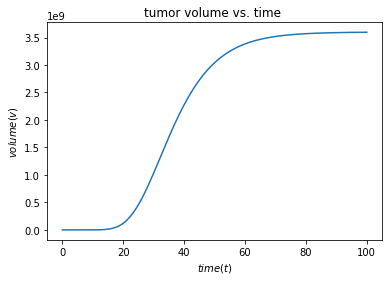

In [20]:
#C. 
def v(t,lamda,a,v0):
    b = 1 - np.exp(-a * t)
    y =  v0*np.exp(lamda/a*b)
    return y 

t = np.linspace(0,100,2000)
vt = v(t,2.5,0.1,50*10**(-3))

plt.plot(t, vt)
plt.xlabel('$time(t)$')
plt.ylabel('$volume(v)$')
plt.title('tumor volume vs. time ')


d. if we plug in the data to the eq. we found in part B: 

$$ \lim_{t\rightarrow \infty}v(t) = 50*10^{-3}*e^{\frac{2.5}{0.1}(1-e^{-0.1*\infty})}$$
$$ = 50*10^{-3}*e^{\frac{2.5}{0.1}}$$
$$ = 3.6* 10^9$$

from the graph we know that the scale of the y axis is 1e9, which is $10^9$, so the mathmatical calculation satisfies the experimental observation. 

2. Transfer Functions from State Space
---

Do Nise Ch 3, problems 14 and 15. Use Python and sympy instead of MATLAB.

P14 

In [27]:
#a.
var("s")
A = Matrix([[0,1,0],[0,0,1],[-3,-2,-5]])
B = Matrix([[0],[0],[10]])
C = Matrix([[1,0,0]])
Phi = (s*eye(3)-A).inv()
Phi

⎡                           2                                                 
⎢  -(s⋅(s + 5) + 2)      2⋅s ⋅(s + 5) + 4⋅s - (2⋅s + 3)⋅(s⋅(s + 5) + 2) + 6  s
⎢──────────────────────  ──────────────────────────────────────────────────  ─
⎢   2                                   ⎛   2                  ⎞              
⎢- s ⋅(s + 5) - 2⋅s - 3             3⋅s⋅⎝- s ⋅(s + 5) - 2⋅s - 3⎠              
⎢                                                                             
⎢          3                                -s⋅(s + 5)                        
⎢──────────────────────                ──────────────────────                 
⎢   2                                     2                                   
⎢- s ⋅(s + 5) - 2⋅s - 3                - s ⋅(s + 5) - 2⋅s - 3                 
⎢                                                                             
⎢                                                                             
⎢         3⋅s                                 2⋅s + 

In [28]:
T = C*Phi*B
T.simplify()
T


⎡         10        ⎤
⎢───────────────────⎥
⎢ 3      2          ⎥
⎣s  + 5⋅s  + 2⋅s + 3⎦

In [29]:
#b.
var("s")
A = Matrix([[2,-3,-8],[0,5,3],[-3,-5,-4]])
B = Matrix([[1],[4],[6]])
C = Matrix([[1,3,6]])
Phi = (s*eye(3)-A).inv()
Phi

⎡               -((s - 5)⋅(s + 4) + 15)                  75⋅s - 5⋅(s - 5)⋅(-(s
⎢     ────────────────────────────────────────────       ─────────────────────
⎢     -15⋅s + (s - 5)⋅(-(s - 2)⋅(s + 4) + 24) + 57                   (3⋅s - 15
⎢                                                                             
⎢                       9⋅s - 45                                              
⎢──────────────────────────────────────────────────────                     ──
⎢(s - 5)⋅(-15⋅s + (s - 5)⋅(-(s - 2)⋅(s + 4) + 24) + 57)                     -1
⎢                                                                             
⎢                       3⋅s - 15                                              
⎢     ────────────────────────────────────────────                          ──
⎣     -15⋅s + (s - 5)⋅(-(s - 2)⋅(s + 4) + 24) + 57                          -1

 - 2)⋅(s + 4) + 24) - (5⋅s - 19)⋅((s - 5)⋅(s + 4) + 15) - 285  -(-s + 2)⋅(s - 
───────────────────────────────────────────────────

In [30]:
T = C*Phi*B
T.simplify()
T

⎡     2                ⎤
⎢ 49⋅s  - 373⋅s + 680  ⎥
⎢──────────────────────⎥
⎢ 3      2             ⎥
⎣s  - 3⋅s  - 27⋅s + 103⎦

In [31]:
#C. 
var("s")
A = Matrix([[3,-5,2],[1,-8,7],[-3,-6,2]])
B = Matrix([[5],[-3],[2]])
C = Matrix([[1,-4,3]])
Phi = (s*eye(3)-A).inv()
Phi

⎡-(-3⋅s - 30)⋅(7⋅(s - 3)⋅(s + 8) - (s + 8)⋅(7⋅s - 19) + 35) + (s + 8)⋅(-(-3⋅s 
⎢─────────────────────────────────────────────────────────────────────────────
⎢                        (-(-3⋅s - 30)⋅(7⋅s - 19) + (-s + 23)⋅(-(s - 3)⋅(s + 8
⎢                                                                             
⎢                                                          -(-s + 23)         
⎢                                   ──────────────────────────────────────────
⎢                                   -(-3⋅s - 30)⋅(7⋅s - 19) + (-s + 23)⋅(-(s -
⎢                                                                             
⎢                                                           -3⋅s - 30         
⎢                                   ──────────────────────────────────────────
⎣                                   -(-3⋅s - 30)⋅(7⋅s - 19) + (-s + 23)⋅(-(s -

- 30)⋅(7⋅s - 19) + (-s + 23)⋅(-(s - 3)⋅(s + 8) - 5))  (-(-3⋅s - 30)⋅(7⋅s - 19)
───────────────────────────────────────────────────

In [32]:
T = C*Phi*B
T.simplify()
T

⎡       2              ⎤
⎢   23⋅s  - 48⋅s - 7   ⎥
⎢──────────────────────⎥
⎢ 3      2             ⎥
⎣s  + 3⋅s  + 19⋅s - 133⎦

## 15.

In [33]:
#a.
var("s")
A = Matrix([[0,1,5,0],[0,0,1,0],[0,0,0,1],[-7,-9,-2,-3]])
B = Matrix([[0],[5],[8],[2]])
C = Matrix([[1,3,6,6]])
Phi = (s*eye(4)-A).inv()
Phi

⎡        ⎛ 2                  ⎞                        ⎛ 2                  ⎞ 
⎢       -⎝s ⋅(s + 3) + 2⋅s + 9⎠          - s⋅(9⋅s + 7)⋅⎝s ⋅(s + 3) + 2⋅s + 9⎠ 
⎢──────────────────────────────────────  ─────────────────────────────────────
⎢   3                                                          2 ⎛   3        
⎢- s ⋅(s + 3) + s⋅(-2⋅s - 35) - 9⋅s - 7                     7⋅s ⋅⎝- s ⋅(s + 3)
⎢                                                                             
⎢                                                                     ⎛   3   
⎢                  7                                  s⋅(9⋅s + 7) + s⋅⎝- s ⋅(s
⎢──────────────────────────────────────               ────────────────────────
⎢   3                                                        2 ⎛   3          
⎢- s ⋅(s + 3) + s⋅(-2⋅s - 35) - 9⋅s - 7                     s ⋅⎝- s ⋅(s + 3) +
⎢                                                                             
⎢                                                   

In [34]:
T = C*Phi*B
T.simplify()
T

⎡  ⎛    3       2             ⎞⎤
⎢3⋅⎝25⋅s  - 32⋅s  - 777⋅s - 70⎠⎥
⎢──────────────────────────────⎥
⎢  4      3      2             ⎥
⎣ s  + 3⋅s  + 2⋅s  + 44⋅s + 7  ⎦

In [36]:
#b.
var("s")
A = Matrix([[3,1,0,4,-2],[-3,5,-5,2,-1],[0,1,-1,2,8],[-7,6,-3,-4,0],[-6,0,4,-3,1]])
B = Matrix([[2],[7],[8],[5],[4]])
C = Matrix([[1,-2,-9,7,6]])
Phi = (s*eye(5)-A).inv()
Phi

⎡(-((-56⋅s + 143)⋅(5⋅s - (s + 1)⋅(-(s - 5)⋅(s - 3) - 3) - 15) - (-(-7⋅s + 17)⋅
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                          ((3⋅s + 3)⋅((-17⋅s + 8)⋅(5⋅s - (s +
⎢                                          ───────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [38]:
T = C*Phi*B
T.simplify()
T

⎡      4        3         2                  ⎤
⎢- 25⋅s  - 292⋅s  + 1680⋅s  + 16282⋅s + 31875⎥
⎢────────────────────────────────────────────⎥
⎢  5      4       3        2                 ⎥
⎣ s  - 4⋅s  - 32⋅s  + 148⋅s  - 1153⋅s - 4480 ⎦

3. Submarine Example
---

Do Nise Ch 3, problem 24.

(Note: In the sixth edition, this problem is a Diabetes model. You can do that instead if you have that edition and already got started on this).

In [61]:
#a.
var("s")
A = Matrix([[-0.038,0.896,0,0.0015],[0.0017,-0.092,0,-0.0056],[1,0,0,-3.086],[0,1,0,0]])
B = Matrix([[-0.0075,-0.023],[0.0017,-0.0022],[0,0],[0,0]])
C = Matrix([[0,0,1,0],[0,0,0,1]])
D = Matrix([0])


In [62]:
# The first transform function in the matrix 
T1 = (C*(s*eye(4)-A).inv()*B)[0]
T1 = cancel(T1)
T1
num1,den1 = fraction(T1)
num1,den1

⎛          2                                   4         3              2     
⎝- 0.0075⋅s  - 0.004413⋅s - 0.0001994591, 1.0⋅s  + 0.13⋅s  + 0.0075728⋅s  + 0.

          ⎞
00021025⋅s⎠

In [63]:
# The second transform function in the matrix 
T1 = (C*(s*eye(4)-A).inv()*B)[1]
T1 = cancel(T1)
T1
num1,den1 = fraction(T1)
num1,den1

⎛         2                                   4         3              2      
⎝- 0.023⋅s  + 0.002702⋅s + 0.0002465522, 1.0⋅s  + 0.13⋅s  + 0.0075728⋅s  + 0.0

         ⎞
0021025⋅s⎠

In [64]:
# The third transform function in the matrix 
T1 = (C*(s*eye(4)-A).inv()*B)[2]
T1 = cancel(T1)
T1
num1,den1 = fraction(T1)
num1,den1

⎛                          3         2                           ⎞
⎝0.0017⋅s + 5.185e-5, 1.0⋅s  + 0.13⋅s  + 0.0075728⋅s + 0.00021025⎠

In [65]:
# The forth transform function in the matrix 
T1 = (C*(s*eye(4)-A).inv()*B)[3]
T1 = cancel(T1)
T1
num1,den1 = fraction(T1)
num1,den1

⎛                            3         2                           ⎞
⎝-0.0022⋅s - 0.0001227, 1.0⋅s  + 0.13⋅s  + 0.0075728⋅s + 0.00021025⎠

In [67]:
#B 
Phi = (s*eye(4)-A).inv()
Phi

⎡                      0.0017⋅s⋅(s + 0.092) + 9.52e-6                         
⎢─────────────────────────────────────────────────────────────────────────    
⎢-0.0017⋅s⋅(-(s + 0.038)⋅(s + 0.092) + 0.0015232) + 9.52e-6⋅s + 3.57425e-7    
⎢                                                                             
⎢                               -0.0017⋅s                                     
⎢    ────────────────────────────────────────────────────────────────         
⎢    s⋅(-(s + 0.038)⋅(s + 0.092) + 0.0015232) - 0.0056⋅s - 0.00021025         
⎢                                                                             
⎢      588.235294117647⋅(0.0017⋅s⋅(s + 0.092) + 6.01460000000001e-7)        58
⎢  ─────────────────────────────────────────────────────────────────────    ──
⎢  s⋅(-s⋅(-(s + 0.038)⋅(s + 0.092) + 0.0015232) + 0.0056⋅s + 0.00021025)      
⎢                                                                             
⎢                                  0.0017           

In [68]:

T = C*Phi*B
T.simplify()
T

⎡            ⎛        2                            ⎞                          
⎢           -⎝0.0075⋅s  + 0.004413⋅s + 0.0001994591⎠                          
⎢        ───────────────────────────────────────────────                  ────
⎢          ⎛     3         2                           ⎞                    ⎛ 
⎢        s⋅⎝1.0⋅s  + 0.13⋅s  + 0.0075728⋅s + 0.00021025⎠                  s⋅⎝1
⎢                                                                             
⎢                      0.0017⋅s + 5.185e-5                                    
⎢───────────────────────────────────────────────────────────────  ────────────
⎣s⋅((s + 0.038)⋅(s + 0.092) - 0.0015232) + 0.0056⋅s + 0.00021025  s⋅((s + 0.03

          2                                        ⎤
 - 0.023⋅s  + 0.002702⋅s + 0.0002465522            ⎥
───────────────────────────────────────────        ⎥
    3         2                           ⎞        ⎥
.0⋅s  + 0.13⋅s  + 0.0075728⋅s + 0.00021025⎠        ⎥
                       

For the matrix, it has the roadmap corresponding to each of the transfer function: 

## $$ \left[\begin{matrix}\frac{z(s)}{\delta_B(s)} & \frac{\theta(s)}{\delta_B(s)} \\\frac{z(s)}{\theta_S(s)} & \frac{\theta(s)}{\delta_S(s)} \end{matrix}\right]$$

4. Endocrine system
---

Do Nise Ch 3, problem 25.

## notation: In my e-textbook, the endocrine question is actually in chapter3, #23; so I choose still do this endocrine problem for the sake of grading. 

Assemble the equations in the problem into the state matrix equation: 

$$ \left[\begin{matrix}\dot x_0 \\ \dot x_1 \\ \dot x_2 \\ \dot x_3 \\ \dot x_4\end{matrix}\right]= \quad \left[\begin{matrix}a_{00} & 0 & a_{02} & 0 & 0 \\a_{10} & a_{11} & a_{12} & 0 & 0\\a_{20} & a_{21} & a_{22} & a_{23} & a_{24}\\ 0 & 0& a_{32} & a_{33} & 0 \\ 0 & 0 & a_{42} & 0 & a_{44}\end{matrix}\right]\left[\begin{matrix} x_0 \\  x_1 \\  x_2 \\  x_3 \\  x_4\end{matrix}\right]+ \quad \left[\begin{matrix}1\\0\\0\\0\\0\end{matrix}\right]d_0$$

5. Representations
---

Do Nise Ch 3, problem 28. Use `sympy`.

refering to the Ch2, problem 65, the transfer function is 

## $$\frac {\theta_m(s)}{E_a(s)} = \frac{\frac{K_t}{J_mR_a}s + \frac{K_tK_m}{J_mR_aD_m}}{  s^3 +(\frac{K_m}{D_m}+\frac{K_bK_t}{J_mR_a})s^2 + (\frac{K_m}{D_m} + \frac{K_bK_tK_m}{J_mD_mR_a})s }$$

pluging in the given information, that $ y = x_1 = \theta_m$, $x_2 = \dot \theta_m$, $ x_3 = i_a$, and $u= e_a$, we have the State-space representation: 


## $$ \dot x = \left[\begin{matrix}0 & 1 & 0 \\0& 0 & 1\\ -(\frac{K_m}{D_m}+\frac{K_bK_t}{J_mR_a}) & -(\frac{K_m}{D_m} + \frac{K_bK_tK_m}{J_mD_mR_a})& 0\end{matrix}\right] x + \left[\begin{matrix} 0\\0\\1   \end{matrix}\right],$$
## $$ y = \left[ \begin{matrix} 0, \frac{K_t}{J_mR_a},\frac{K_tK_m}{J_mR_aD_m} \end{matrix}\right]$$ 


in the form $ \dot x = Ax +Bu, y = Cx$.

6. Control of HIV/AIDS
---

Do Nise Ch 3, problem 31

a. Solving the partial derivative of elementwise for the matrix: 

$$ x = \left[\begin{matrix}\dot T \\ \dot T^* \\ \dot v \end{matrix}\right]= \quad \left[\begin{matrix}
-d-(1-u_1)\beta v & 0 & -(1-u_1)\beta Tv \\
(1-u_1)\beta v & -\mu & (1-u_1)\beta T \\
0 & (1-u_2)k & -c \end{matrix}\right]\left[\begin{matrix} T \\  T^* \\  v \end{matrix}\right]+ \quad \left[\begin{matrix}-\beta Tv & 0 \\-\beta Tv & 0\\0 & -KT^*\end{matrix}\right] \quad \left[\begin{matrix} u_1 \\u_2\end{matrix}\right]$$
since $ u_10 = u_20 = 0, $ the equation becomes: 
$$ x = \left[\begin{matrix}\dot T \\ \dot T^* \\ \dot v \end{matrix}\right]= \quad \left[\begin{matrix}
-d-\beta v & 0 & -\beta Tv \\
\beta v & -\mu & \beta T \\
0 & k & -c \end{matrix}\right]\left[\begin{matrix} T \\  T^* \\  v \end{matrix}\right]+ \quad \left[\begin{matrix}-\beta Tv & 0 \\-\beta Tv & 0\\0 & -KT^*\end{matrix}\right] \quad \left[\begin{matrix} u_1 \\u_2\end{matrix}\right]$$

b.  plug in $ T_0, T^*_0, v_0$ to the matrix: 
$$ \dot x = \left[\begin{matrix}\dot T \\ \dot T^* \\ \dot v \end{matrix}\right]= \quad \left[\begin{matrix}
-d-\beta v_0 & 0 & -\beta T_0v_0 \\
\beta v_0 & -\mu & \beta T_0 \\
0 & k & -c \end{matrix}\right]\left[\begin{matrix} T \\  T^* \\  v \end{matrix}\right]+ \quad \left[\begin{matrix}\beta T_0v_0 & 0 \\-\beta T_0v_0 & 0\\0 & -K_0T^*_0\end{matrix}\right] \quad \left[\begin{matrix} u_1 \\u_2\end{matrix}\right]$$

where A and B is equal to the given matrix of the problem. 

c. substituting the values into the matrix: 
$T_0 = \frac{c\mu}{\beta k} = 240$, $T^*_0 = \frac{s}{\mu}-\frac{cd}{\beta k} = 21.67$, $v_0 = \frac{sk}{c\mu} -\frac{d}{\beta}= 902.7$
$$ \dot x = \left[\begin{matrix}\dot T \\ \dot T^* \\ \dot v \end{matrix}\right]= \quad \left[\begin{matrix}
-0.0417 & 0 &-0.0058 \\
0.0217 & -0.24 &0.0058 \\
0 & 100 & -2.4 \end{matrix}\right]x+ \quad \left[\begin{matrix}-\beta 5.2 & 0 \\-5.2 & 0\\0 & --2166.7\end{matrix}\right] u$$
$$ y = [\begin{matrix}0 & 0  &1\end{matrix}]x$$

7. Final Value Theorem
---

Using the system defined in Nise Ch 4, problem 10, find the final value of the system given a step input. Calculate this two different ways: (a) By solving for the final value directly in state space. (b) By finding the system's transfer function and computing the final value using the frequency domain method. Ok to use `sympy`. Refer to the "Transfer Functions" Python notebook.

In [73]:
#way1 
var("t tau")
A = Matrix([[3,-4,2],[-2,0,1],[4,7,5]])
B = Matrix([[-1],[-2],[3]])
C = Matrix([[1,7,1]])
x0 = Matrix([[0],[0],[0]])
u = 1

y = -C*A.inv()*B
y
#y = C*(exp(A*t)*x0 + integrate(exp(A*(t-tau))*B*u,(tau,0,t)))
#tvals = np.linspace(0,10,100)
#f = lambdify(t,y[0], modules=['numpy'])
#plt.plot(tvals,f(tvals));
#plt.xlabel("$t$")
#plt.ylabel("$y(t)$")
#plt.title("Step response of system with final value 2");

⎡-352 ⎤
⎢─────⎥
⎣ 105 ⎦

In [75]:
#way2 
var("s")
A = Matrix([[3,-4,2],[-2,0,1],[4,7,5]])
B = Matrix([[-1],[-2],[3]])
C = Matrix([[1,7,1]])
Phi = (s*eye(3)-A).inv()
Phi
T = C*Phi*B
T.simplify()
T


⎡      2              ⎤
⎢- 12⋅s  + 139⋅s - 352⎥
⎢─────────────────────⎥
⎢ 3      2            ⎥
⎣s  - 8⋅s  - 8⋅s + 105⎦

For the final value, let s = 0, so the transfer equation gets the value : 

$\frac{-352}{105}$